In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math

In [ ]:
#collecting the data and displaying the dataset
df_stock = pd.read_csv('04. TSLA_2023-04-10-2025-04-08.csv')
df_stock

,date,open,low,high,close,volume,transactions,vwap
0,4/10/23,179.940,176.1100,185.1000,184.51,142054637,1320894,181.0650
1,4/11/23,186.690,185.6475,189.1900,186.79,115770892,1073591,187.3863
2,4/12/23,190.740,180.3100,191.5846,180.54,150256278,1344528,184.4904
3,4/13/23,182.955,180.9400,186.5000,185.90,112932985,979661,184.8249
4,4/14/23,183.950,182.0100,186.2800,185.00,96408489,874608,184.0059
...,...,...,...,...,...,...,...,...
497,4/2/25,254.600,251.2700,284.9900,282.76,212781017,2716690,273.6954
498,4/3/25,265.290,261.5100,276.3000,267.28,135871491,1807951,268.1336
499,4/4/25,255.380,236.0000,261.0000,239.43,181206728,2734610,244.8183
500,4/7/25,223.780,214.2500,252.0000,233.29,183126699,2843788,230.0561


In [ ]:
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock = df_stock.set_index('date')
df_stock

<ipython-input-3-df3e6ef05be2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock['date'] = pd.to_datetime(df_stock['date'])


,open,low,high,close,volume,transactions,vwap
date,,,,,,,
2023-04-10,179.940,176.1100,185.1000,184.51,142054637,1320894,181.0650
2023-04-11,186.690,185.6475,189.1900,186.79,115770892,1073591,187.3863
2023-04-12,190.740,180.3100,191.5846,180.54,150256278,1344528,184.4904
2023-04-13,182.955,180.9400,186.5000,185.90,112932985,979661,184.8249
2023-04-14,183.950,182.0100,186.2800,185.00,96408489,874608,184.0059
...,...,...,...,...,...,...,...
2025-04-02,254.600,251.2700,284.9900,282.76,212781017,2716690,273.6954
2025-04-03,265.290,261.5100,276.3000,267.28,135871491,1807951,268.1336
2025-04-04,255.380,236.0000,261.0000,239.43,181206728,2734610,244.8183


In [ ]:
# Open: The price at which a stock first starts trading for the specified period (e.g., a day).
# High: The highest price the stock reaches during that period.
# Low: The lowest price the stock reaches during that period.
# Close: The last price the stock trades at before the end of the period (e.g., the stock market closes for the day)
df_stock.describe()

,open,low,high,close,volume,transactions,vwap
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,5.020000e+02,502.000000
mean,243.974411,238.429500,249.222483,243.862669,1.069281e+08,1.272580e+06,243.930252
std,68.018331,65.597941,69.757794,67.652344,3.434352e+07,4.041326e+05,67.657719
min,140.560000,138.802500,144.440000,142.050000,3.716762e+07,5.194770e+05,141.702300
25%,189.295000,185.974425,196.661975,191.632500,8.186258e+07,1.000942e+06,191.800475
50%,235.070000,231.650000,240.400000,236.170000,1.039798e+08,1.204558e+06,235.272450
75%,260.600000,255.815075,266.414975,261.582500,1.253956e+08,1.427900e+06,261.857375
max,475.900000,457.510100,488.539900,479.860000,2.436800e+08,3.203853e+06,473.816200


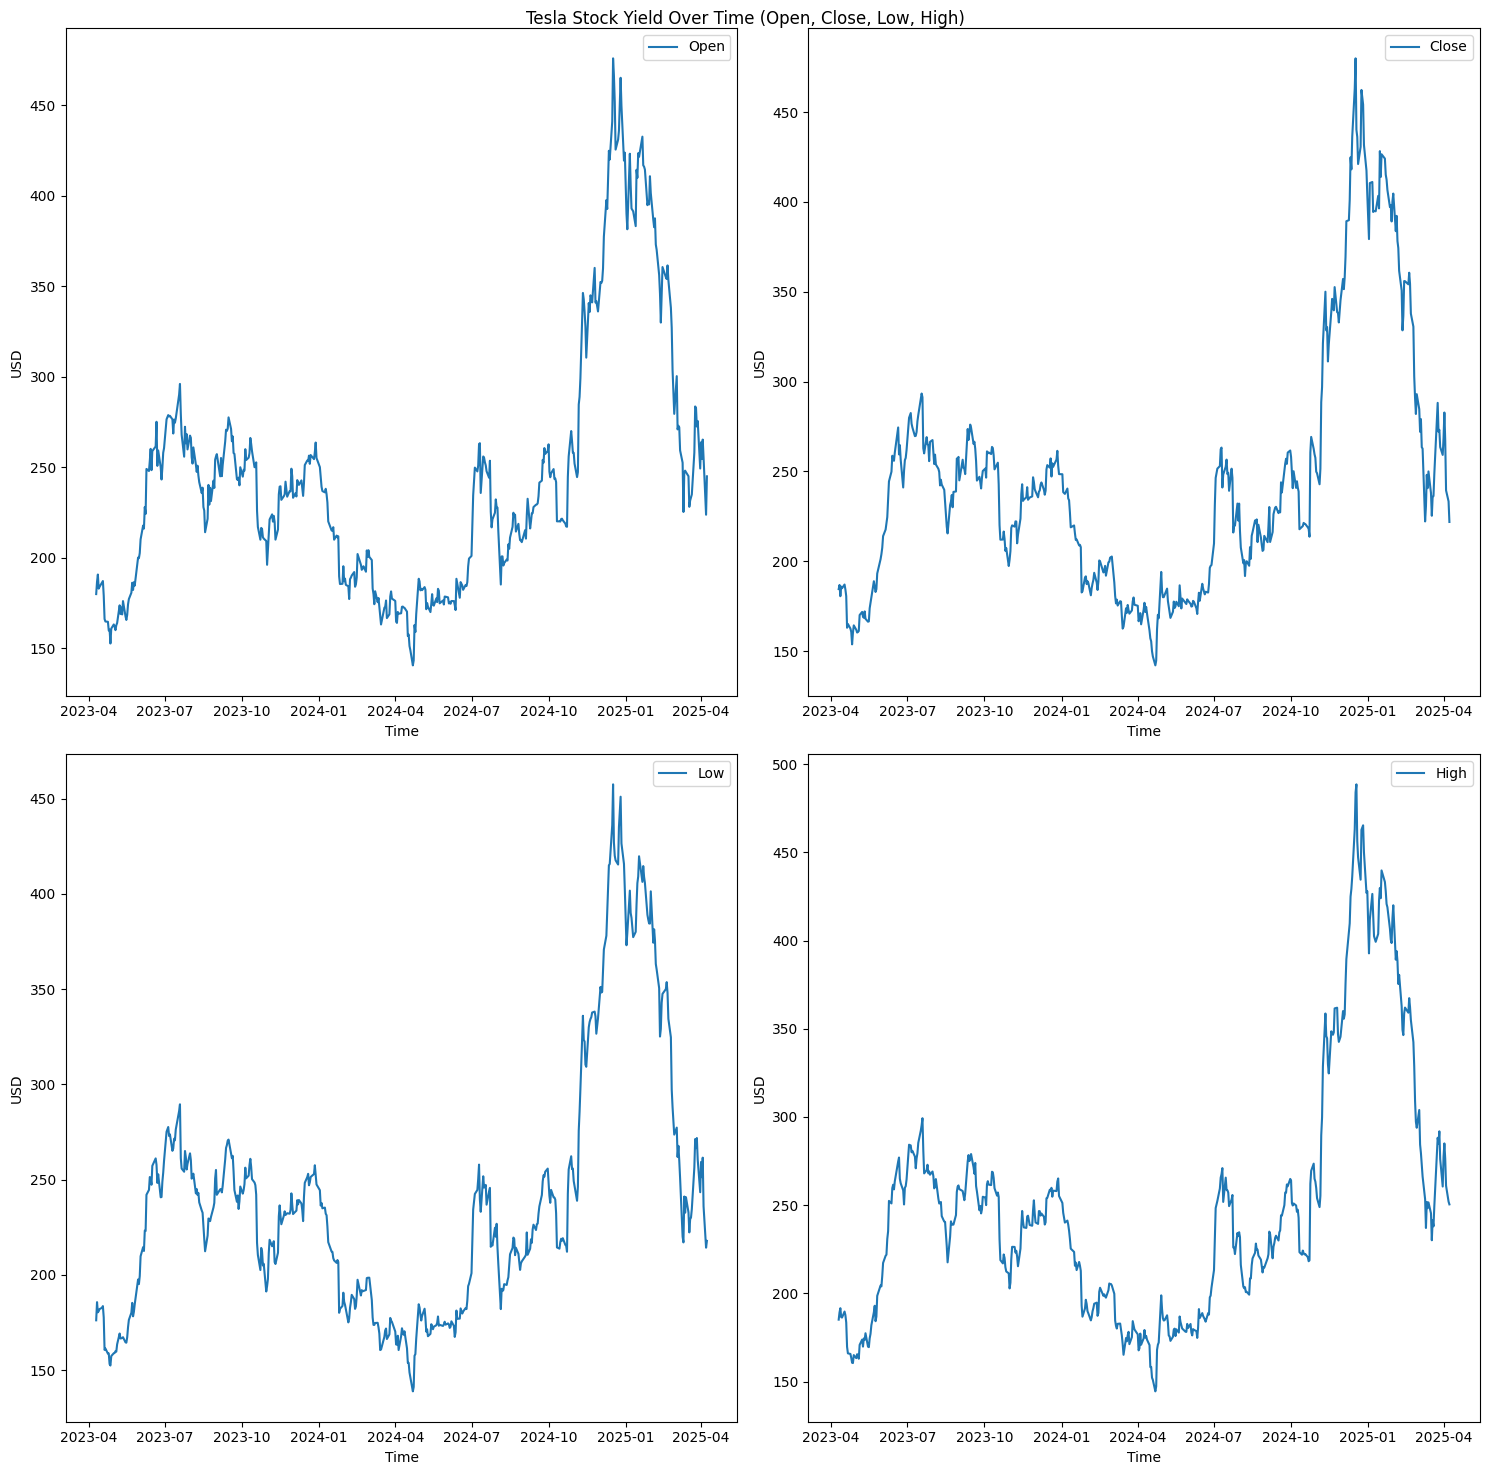

In [ ]:
## Creating subplots to descriptive analysis about the stock value at its highestlowest price and opening/closing price during a period of time
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0, 0].plot(df_stock.index, df_stock['open'], label='Open')
ax[0, 1].plot(df_stock.index, df_stock['close'], label='Close')
ax[1,0].plot(df_stock.index, df_stock['low'], label='Low')
ax[1,1].plot(df_stock.index, df_stock['high'], label='High')
for i in range(2):
  for j in range(2):
    ax[i,j].legend()
    ax[i,j].set_xlabel('Time')
    ax[i,j].set_ylabel('USD')
fig.suptitle('Tesla Stock Yield Over Time (Open, Close, Low, High)')
fig.tight_layout()
plt.show()

In [ ]:
data = df_stock['close'].values
num = math.ceil(len(data)*.8)  # number of rows to train the model on
num

402

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data.reshape(-1,1)) # Reshape data to 2D
scaled_data

array([[0.12569196],
       [0.13244131],
       [0.11393979],
       [0.1298067 ],
       [0.12714248],
       [0.13318137],
       [0.12509991],
       [0.1140878 ],
       [0.06198751],
       [0.06817442],
       [0.060685  ],
       [0.05511974],
       [0.03463485],
       [0.05369882],
       [0.06589503],
       [0.05855362],
       [0.05405405],
       [0.05494213],
       [0.05668867],
       [0.08291643],
       [0.08803765],
       [0.08022261],
       [0.07841686],
       [0.08889613],
       [0.07675912],
       [0.07193393],
       [0.07243717],
       [0.09416536],
       [0.1031349 ],
       [0.11275569],
       [0.13859862],
       [0.12942186],
       [0.12092596],
       [0.12557355],
       [0.15132767],
       [0.17498002],
       [0.18317989],
       [0.19380717],
       [0.21290074],
       [0.22367603],
       [0.23462893],
       [0.24427933],
       [0.27474024],
       [0.30298097],
       [0.31905509],
       [0.34534206],
       [0.33965839],
       [0.337

In [ ]:
df_stock['MA_Volume'] = df_stock['volume'].rolling(window=3).mean()
df_stock

,open,low,high,close,volume,transactions,vwap,MA_Volume
date,,,,,,,,
2023-04-10,179.940,176.1100,185.1000,184.51,142054637,1320894,181.0650,NaN
2023-04-11,186.690,185.6475,189.1900,186.79,115770892,1073591,187.3863,NaN
2023-04-12,190.740,180.3100,191.5846,180.54,150256278,1344528,184.4904,1.360273e+08
2023-04-13,182.955,180.9400,186.5000,185.90,112932985,979661,184.8249,1.263201e+08
2023-04-14,183.950,182.0100,186.2800,185.00,96408489,874608,184.0059,1.198659e+08
...,...,...,...,...,...,...,...,...
2025-04-02,254.600,251.2700,284.9900,282.76,212781017,2716690,273.6954,1.643570e+08
2025-04-03,265.290,261.5100,276.3000,267.28,135871491,1807951,268.1336,1.650465e+08
2025-04-04,255.380,236.0000,261.0000,239.43,181206728,2734610,244.8183,1.766197e+08


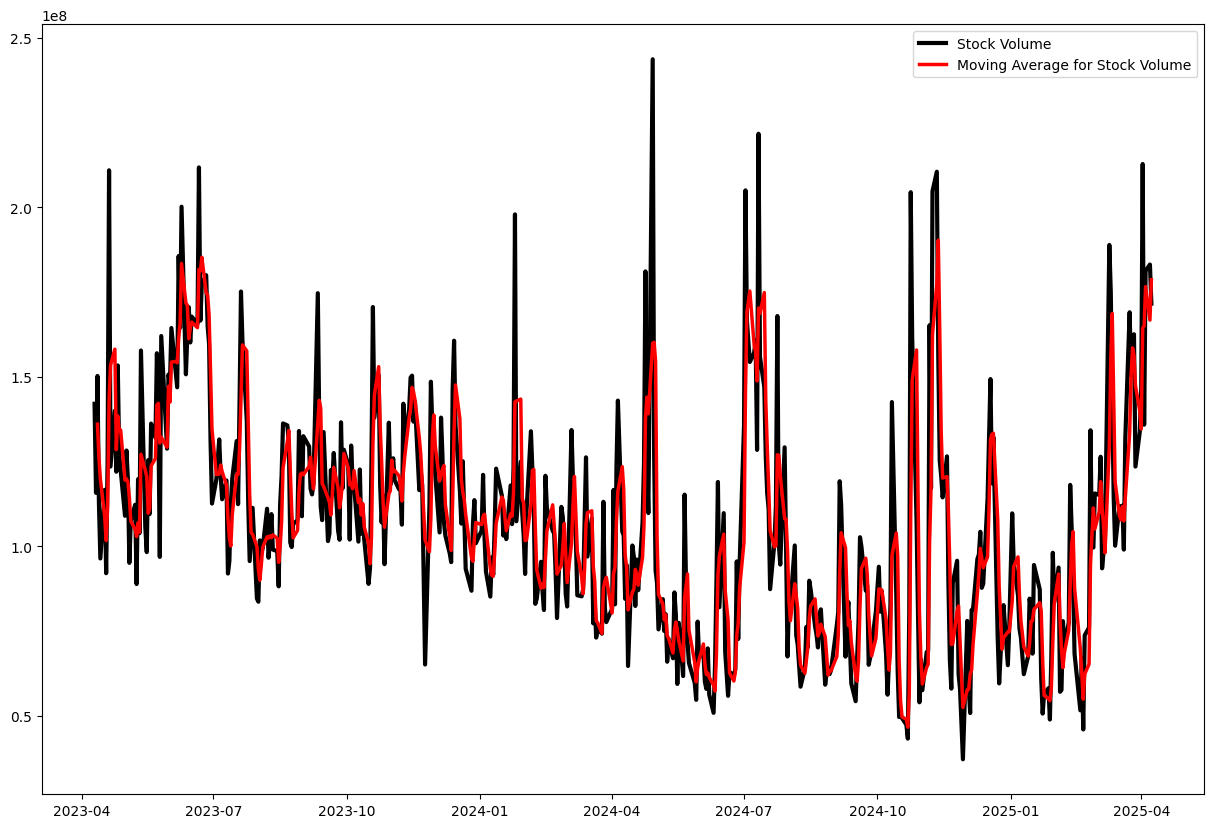

In [ ]:
# For Stock volume
#https://www.investopedia.com/articles/technical/02/010702.asp#:~:text=Stock%20volume%20is%20an%20important,could%20improve%20your%20trading%20decisions.
plt.figure(figsize=(15,10))
plt.plot(df_stock.index, df_stock['volume'], linewidth=3, color='black', label='Stock Volume')
plt.plot(df_stock.index, df_stock['MA_Volume'], linewidth=2.5, color = 'red', label='Moving Average for Stock Volume')
plt.legend()
plt.show()

In [ ]:
train_data = scaled_data[0:num, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
look_back = 60
for i in range(look_back,len(train_data)):
    x_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i,0])



In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(342, 60, 1)

In [ ]:
test_data= scaled_data[num-look_back:, :]
#create the data sets x_test and y_test
x_test = []
y_test = data[num:] # remove the extra ':'  to index a 1D array
for i in range(look_back,len(test_data)):
    x_test.append(test_data[i-look_back:i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(100, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,691 (330.82 KB)

 Trainable params: 84,691 (330.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, batch_size=20, epochs=50, verbose=2)

Epoch 1/50
18/18 - 5s - 303ms/step - loss: 0.0130
Epoch 2/50
18/18 - 1s - 66ms/step - loss: 0.0040
Epoch 3/50
18/18 - 1s - 74ms/step - loss: 0.0033
Epoch 4/50
18/18 - 1s - 60ms/step - loss: 0.0029
Epoch 5/50
18/18 - 2s - 84ms/step - loss: 0.0029
Epoch 6/50
18/18 - 2s - 136ms/step - loss: 0.0027
Epoch 7/50
18/18 - 1s - 59ms/step - loss: 0.0027
Epoch 8/50
18/18 - 1s - 72ms/step - loss: 0.0024
Epoch 9/50
18/18 - 1s - 70ms/step - loss: 0.0022
Epoch 10/50
18/18 - 1s - 61ms/step - loss: 0.0029
Epoch 11/50
18/18 - 1s - 75ms/step - loss: 0.0032
Epoch 12/50
18/18 - 1s - 71ms/step - loss: 0.0023
Epoch 13/50
18/18 - 1s - 70ms/step - loss: 0.0019
Epoch 14/50
18/18 - 2s - 97ms/step - loss: 0.0019
Epoch 15/50
18/18 - 2s - 114ms/step - loss: 0.0017
Epoch 16/50
18/18 - 1s - 64ms/step - loss: 0.0020
Epoch 17/50
18/18 - 1s - 59ms/step - loss: 0.0017
Epoch 18/50
18/18 - 1s - 59ms/step - loss: 0.0016
Epoch 19/50
18/18 - 1s - 66ms/step - loss: 0.0017
Epoch 20/50
18/18 - 1s - 70ms/step - loss: 0.0016
Epoch 

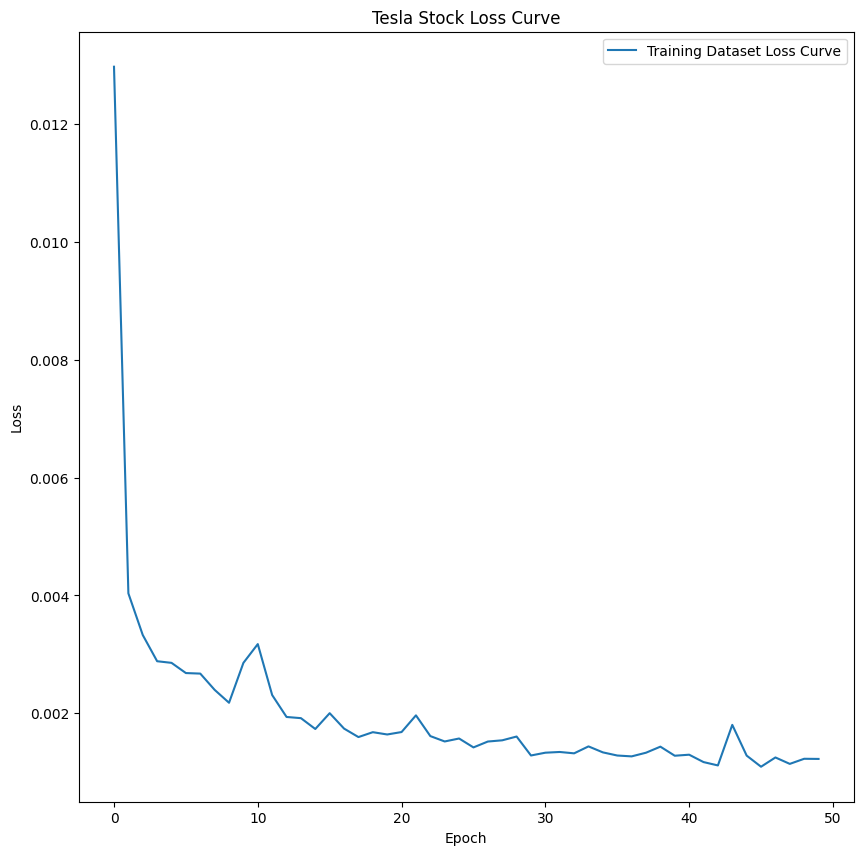

In [ ]:
##plotting the loss curve to gain a better understanding of our model
plt.figure(figsize=(10,10))
plt.title('Tesla Stock Loss Curve')
plt.plot(history.history['loss'], label='Training Dataset Loss Curve')
# plt.plot(history.history['val_loss'], label='Testing Dataset Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## RMSE is a good metric to evaluate our model's ability to forecast Tesla's stock value in the next few periods
# we first need our predicted y in the test dataset
y_pred = model.predict(x_test)
predictions = scaler.inverse_transform(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

np.float64(9.783698645019534)

In [ ]:
training_set = data[:num]
validation_set = data[num:]

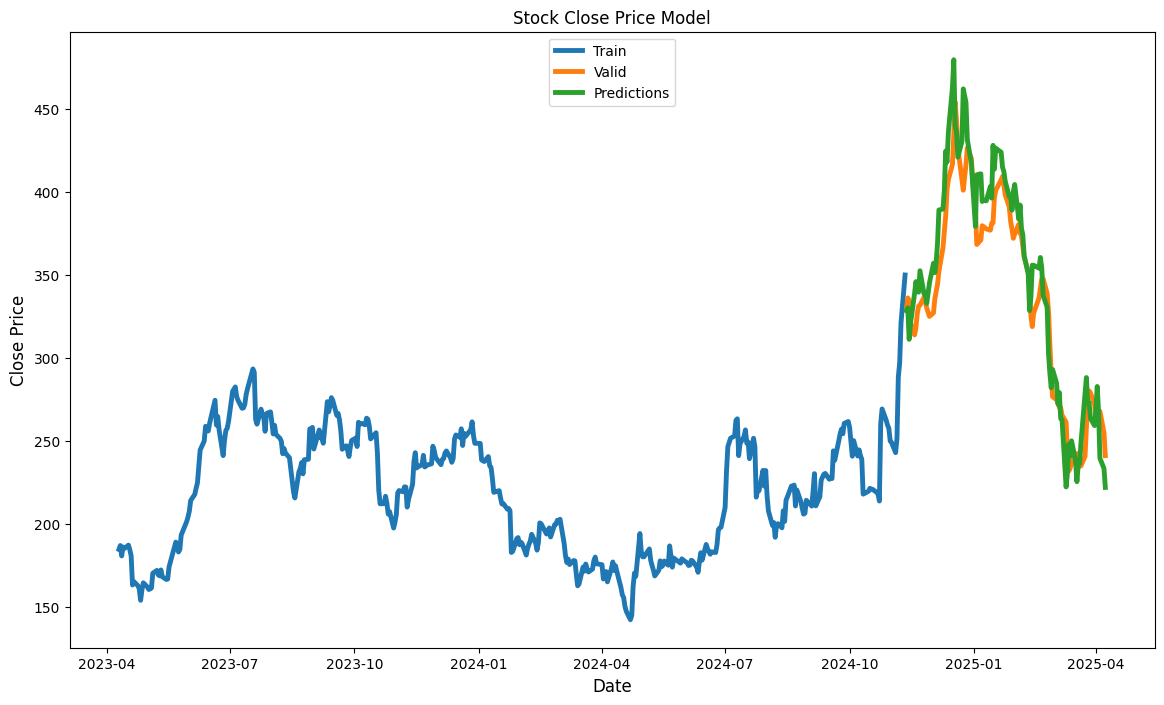

In [ ]:
# Convert valid to a pandas DataFrame for column assignment
valid = pd.DataFrame(validation_set, index=df_stock.index[num:])
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(14,8))
plt.title('Stock Close Price Model')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price' ,fontsize=12)
# Update plotting to use the DataFrame's index
plt.plot(df_stock.index[:num], training_set, linewidth=3.5)  # Plot train against original index
plt.plot(valid[['Predictions']], linewidth=3.5)  # Plot 'Predictions' from DataFrame
plt.plot(valid.index, valid[0], linewidth=3.5, label='Valid')
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper center')

In [ ]:
last_instance = x_test[-1]  # get the last window
future = []
for i in range(52):
    # Predict next value
    next_pred = model.predict(last_instance[np.newaxis, :, :], verbose=0)  # add batch dimension

    # Store prediction
    future.append(next_pred[0, 0])  # assuming 1 output neuron

    # Update the input sequence: remove first value, append prediction
    last_instance = np.append(last_instance[1:], next_pred[0].reshape(-1, 1), axis=0)
forecast = scaler.inverse_transform(np.array(future).reshape(-1, 1))
forecast = pd.DataFrame(forecast)
forecast

,0
0,241.036469
1,235.219467
2,231.876083
3,229.672806
4,228.208588
5,227.312149
6,226.870575
7,226.789429
8,226.984726
9,227.381989


In [ ]:
import datetime
date = datetime.datetime(2025, 4, 9)
date_list = []
for i in range(52):
  date += datetime.timedelta(days=1)
  date_list.append(date)
dateCol = pd.DataFrame(date_list)
forecast = pd.merge(dateCol, forecast, left_index=True, right_index=True)

In [ ]:
forecast = forecast.rename(columns={'0_x':'Time','0_y':'Forecast'})
forecast = forecast.set_index('Time')
forecast

,Forecast
Time,
2025-04-10,241.036469
2025-04-11,235.219467
2025-04-12,231.876083
2025-04-13,229.672806
2025-04-14,228.208588
2025-04-15,227.312149
2025-04-16,226.870575
2025-04-17,226.789429
2025-04-18,226.984726


<Figure size 1400x800 with 0 Axes>

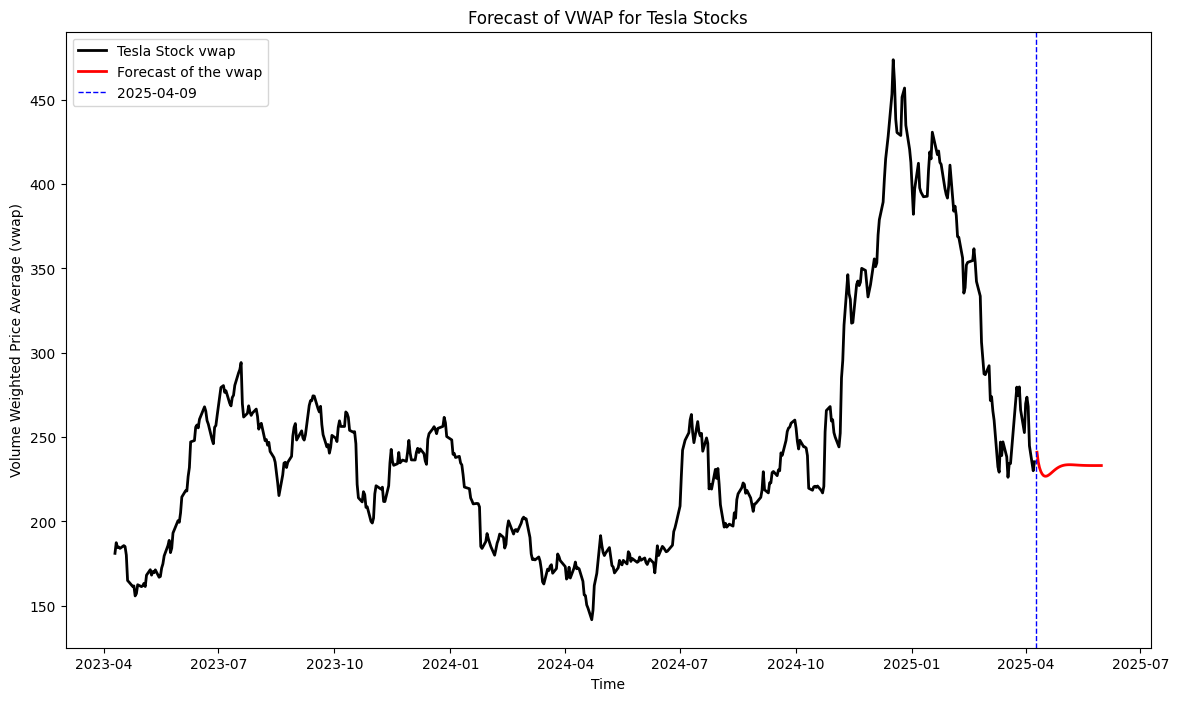

In [ ]:
plt.figure(figsize=(14,8))
import datetime
plt.figure(figsize=(14,8))
plt.plot(df_stock.index, df_stock['vwap'], linewidth=2, color='black', label='Tesla Stock vwap')
plt.plot(forecast.index, forecast['Forecast'], linewidth=2, color='r', label='Forecast of the vwap')
plt.axvline(x=datetime.date(2025,4,9), color='b', linestyle='--', linewidth=1, label='2025-04-09')
plt.legend()
plt.title('Forecast of VWAP for Tesla Stocks')
plt.xlabel('Time')
plt.ylabel('Volume Weighted Price Average (vwap)')
plt.show()